In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [7]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.weather.go.kr/w/weather/forecast/short-term.do')
driver.implicitly_wait(1)
print(driver.find_element(By.ID, "my-tchart").text)

17℃
17℃
15℃
15℃
14℃
15℃
15℃
15℃
16℃
17℃
18℃
19℃
21℃
22℃
22℃
20℃
18℃
17℃
15℃


In [9]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.weather.go.kr/w/weather/forecast/short-term.do')
driver.implicitly_wait(1)
temps = driver.find_element(By.ID, "my-tchart").text

temps = [int(i) for i in temps.replace("℃", "").split('\n')]

print(temps)

[18, 17, 15, 15, 14, 15, 15, 15, 16, 17, 18, 19, 21, 22, 22, 20, 18, 17, 15]


<Axes: >

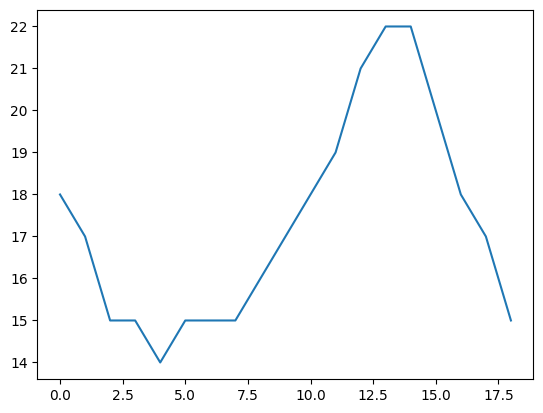

In [11]:
import seaborn as sns

sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

<Axes: >

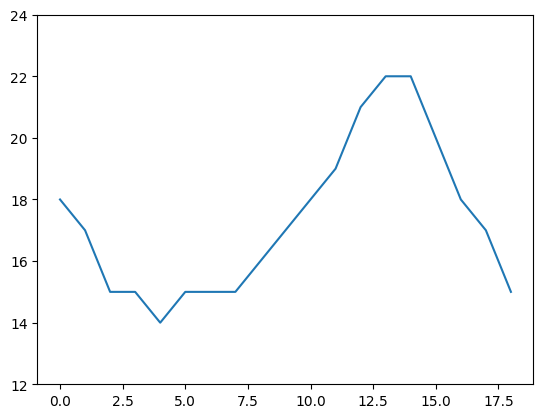

In [12]:
import matplotlib.pyplot as plt

plt.ylim(min(temps) - 2, max(temps) + 2)
sns.lineplot(
    x = [i for i in range(len(temps))],
    y = temps
)

In [13]:
import requests
from bs4 import BeautifulSoup

user_agent = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"}

In [20]:
import time
frequency = {}

for i in range(1, 11):
    res = requests.get(f'https://hashcode.co.kr/?page={i}', user_agent)
    soup = BeautifulSoup(res.text, 'html.parser')

    ul_tags = soup.find_all('ul', 'question-tags')
    for ul in ul_tags:
        li_tags = ul.find_all('li')
        for li in li_tags:
            frequency[li.text.strip()] = frequency.get(li.text.strip(), 0) + 1
    time.sleep(0.5)
            
print(frequency)

{'game': 4, 'java': 42, 'javac': 1, 'python': 232, 'json': 2, 'return': 2, 'asp.net': 1, 'c': 43, 'ubuntu': 3, 'vmware': 1, 'multithreading': 1, 'algorithm': 6, 'coding-test': 4, 'bfs': 1, 'react': 7, 'javascript': 16, 'arduino': 4, 'node.js': 8, 'regex': 3, 'multiprocessing': 1, 'pygame': 1, 'html': 13, 'css': 7, 'application-development': 1, 'logistic-regression': 2, 'logistic': 1, 'error': 7, 'pandas': 21, 'dataframe': 9, 'csv': 4, 'class': 8, 'instance': 1, 'hashmap': 1, 'object': 1, 'beautifulsoup': 5, 'windows': 3, 'for': 9, 'selenium-webdrive': 6, 'c++': 21, 'mfc': 1, 'win32': 1, 'django': 5, 'recursive': 4, 'flatten': 1, 'python3': 9, 'dictionary': 4, 'array': 3, 'initialization': 2, 'qt': 2, 'pdf': 1, 'hashcode': 1, 'kotlin': 4, 'private': 2, 'image': 3, 'netlify': 1, 'data': 2, 'directory': 1, 'cv2': 1, 'raspberry-pi': 2, 'dom': 1, 'asynchronous': 1, 'jquery': 2, 'vb.net': 1, 'post': 1, 'webrequest': 1, 'data-structure': 2, 'html5': 2, 'accordion': 1, 'user-interface': 1, 'op

In [23]:
from collections import Counter

counter = Counter(frequency)
counter.most_common(10)

[('python', 232),
 ('c', 43),
 ('java', 42),
 ('pandas', 21),
 ('c++', 21),
 ('javascript', 16),
 ('html', 13),
 ('crawling', 10),
 ('selenium', 10),
 ('dataframe', 9)]

<Axes: >

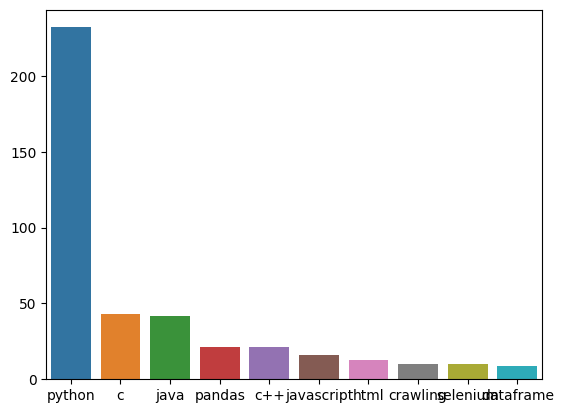

In [24]:
x = [i[0] for i in counter.most_common(10)]
y = [i[1] for i in counter.most_common(10)]

sns.barplot(x=x, y=y)

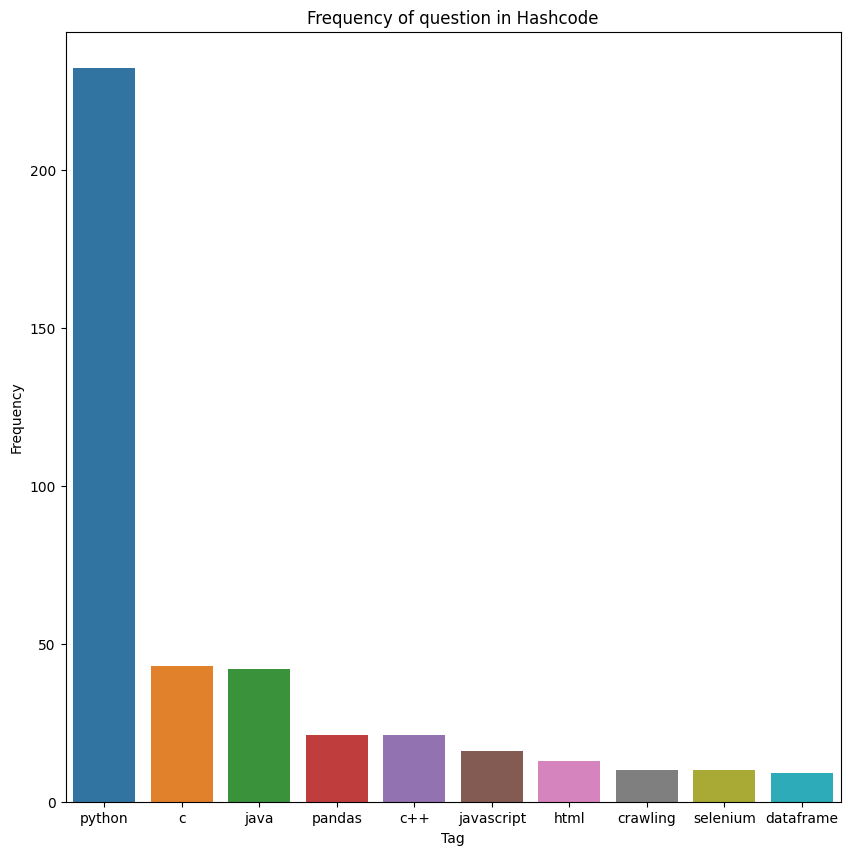

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Frequency of question in Hashcode')
plt.xlabel('Tag')
plt.ylabel('Frequency')
sns.barplot(x=x, y=y)
plt.show()